In [24]:
from datetime import datetime
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

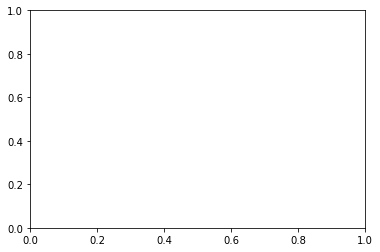

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)     #축을 그려준다 (1행 1열 1개의 그래프)

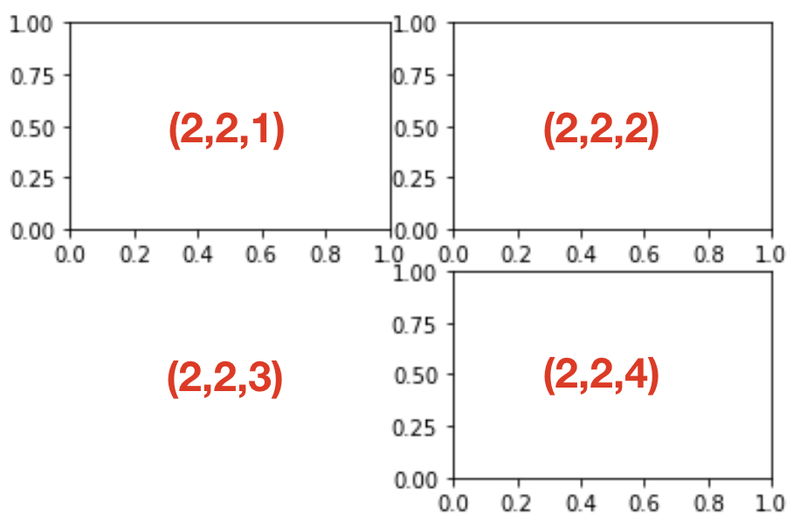

- fig.add_subplot(2,2,1)
- fig.add_subplot(2,2,2)
- fig.add_subplot(2,2,4)

In [14]:
ax1.bar(subject,points)

<BarContainer object of 5 artists>

Text(0.5, 1.0, "Yuna's Test Result")

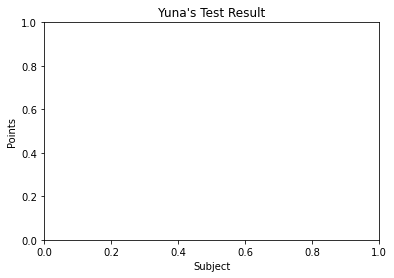

In [15]:
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

In [9]:
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show() 

<Figure size 432x288 with 0 Axes>

- 응용

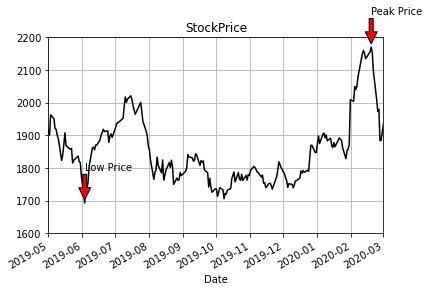

In [17]:
data = pd.read_csv('AMZN.csv' ,index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600,2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d,price.asof(d)+100), # 주석 텍스트가 위차할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

- 다양한 옵션

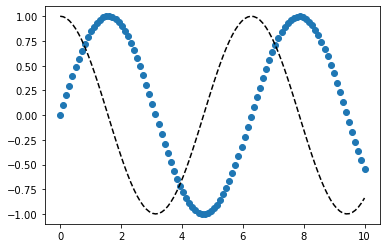

In [21]:
x = np.linspace(0, 10, 100) #0에서 10까지 균등한 간격으로  100개의 숫자를 만들라는 뜻입니다.
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x),'--', color='black') 
plt.show()

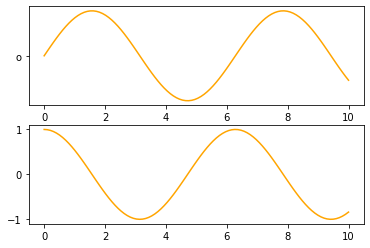

In [22]:
x = np.linspace(0, 10, 100) 

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

- linestyle, marker 옵션

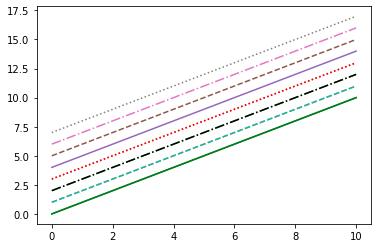

In [23]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

#### pandas.plot메서드 인자

- label: 그래프의 범례이름.
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체.
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할 지 여부

#### pandas의 data가 DataFrame일때 plot 메서드 인자

- subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
- sharex: subplots=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.
- sharey: subplots=True면 같은 Y축을 공유한다.
- figsize: 그래프의 크기, 튜플로 지정
- title: 그래프의 제목을 문자열로 지정
- sort_columns: 칼럼을 알파벳 순서로 그린다.

## 정리해보자면

1. fig = plt.figure() : figure 객체를 선언해 도화지를 펼쳐준다.
2. ax1 = fig.add_subplot(1,1,1) : 축을 그린다.
3. ax1.bar(x,y) : 축 안에 어떤 그래프를 그릴 지 메소드를 선택한 후 인자로 데이터를 넣어준다.
4. grid, xlabel, ylabel 등 추가
5. plt.savefig 를 이용해 저장


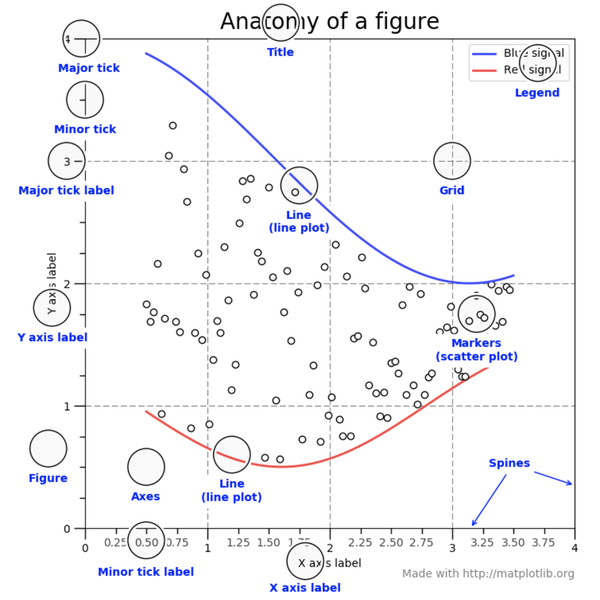

In [26]:
tips = sns.load_dataset('tips')

### 데이터 살펴보기 ( EDA)

In [27]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df.shape

(244, 7)

In [29]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 카테고리별 개수

In [31]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


#### 범주형 데이터

In [32]:
grouped = df['tip'].groupby(df['sex'])

In [33]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

- 성별에 따른 팁 액수의 평균을 막대그래프로 나타내 보자

In [35]:
sex = dict(grouped.mean())

In [37]:
x = list(sex.keys())
x

['Male', 'Female']

In [39]:
y = list(sex.values())
y

[3.0896178343949052, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

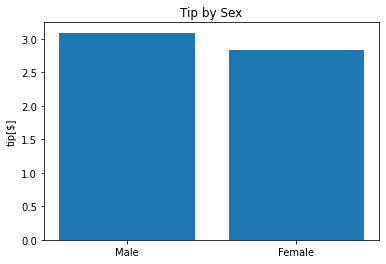

In [40]:
plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

#### violin plot 을 이용한 요일별 팁

<AxesSubplot:xlabel='day', ylabel='tip'>

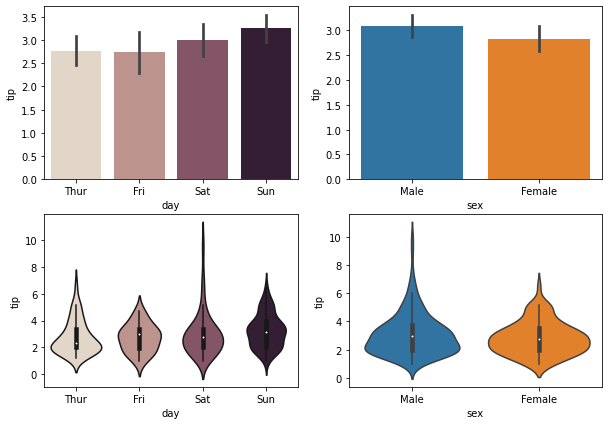

In [41]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

### 수치형 데이터

- 음식 가격에 따른 tip 데이터 시각화

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

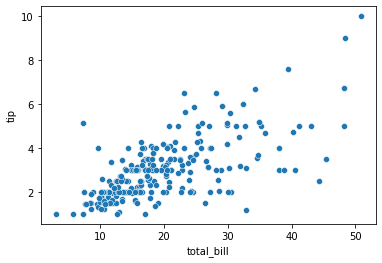

In [42]:
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

### 시계열 데이터 시각화하기

- flights.csv. 를 이용하여 그래프 그리기

In [43]:
data = pd.read_csv('flights.csv')
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

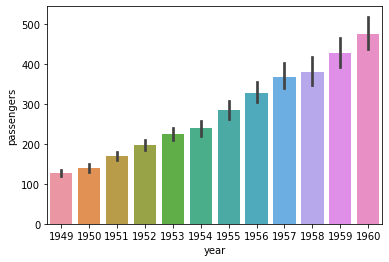

In [44]:
sns.barplot(data= flights, x= 'year', y= 'passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

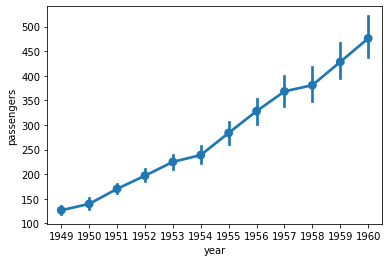

In [45]:
sns.pointplot(data= flights, x= 'year', y= 'passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

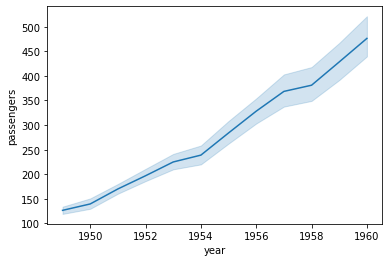

In [46]:
sns.lineplot(data= flights, x= 'year', y= 'passengers')

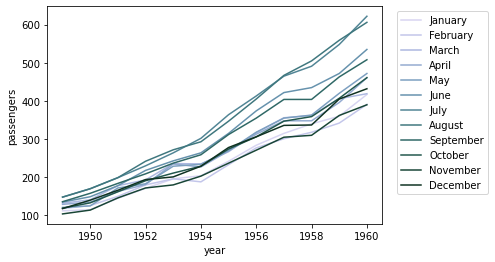

In [48]:
sns.lineplot(data= flights, x= 'year', y= 'passengers', hue= 'month', palette= 'ch:50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)    #legend 그래프 밖에 추가하기

C:\Users\jjun8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passengers', ylabel='Density'>

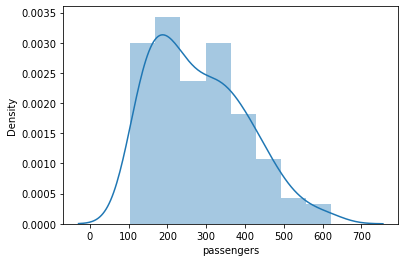

In [49]:
sns.distplot(flights['passengers'])

### Heatmap

- 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것으로, 데이터 차원에 대한 제한은 없으나 모두 2차원으로 시각화하여 표현한다.

- Heatmap을 그리기 위해 데이터를 pivot 해야 하는 경우가 있다.

In [50]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

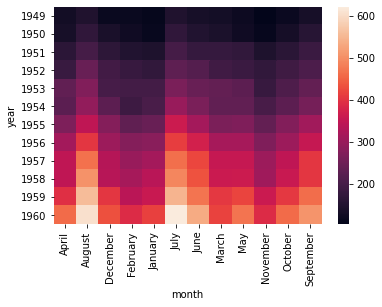

In [51]:
sns.heatmap(pivot)